<a href="https://colab.research.google.com/github/Ssdosaofc/ML-model-from-scratch/blob/main/KNearestNeighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import statistics
%matplotlib inline

In [2]:
train = pd.read_csv("/content/drive/MyDrive/ML/Classification_train.csv")
test = pd.read_csv("/content/drive/MyDrive/ML/Classification_test.csv")

In [3]:
def test_train_split(x):
  x = np.array(x)
  train_proportion = 0.6
  train_test_cut = int(len(x)*train_proportion)

  train_data,cv_data = \
      x[:train_test_cut], \
      x[train_test_cut:]

  return train_data,cv_data

In [4]:
train_data,cv_data = test_train_split(train)

In [5]:
a,b = train_data.shape
b

785

In [6]:
def get_distance(distance_formula,train_data_point,test_data_point,b):
  x_train = train_data_point[1:b]
  x_test = test_data_point[1:b]
  if(distance_formula == 'euclidean'):
    dist = np.sum((x_train-x_test)**2)
    eucl_dist = np.sqrt(dist)
    return eucl_dist
  if(distance_formula == 'manhattan'):
    manhattan_dist = np.sum(abs(x_train-x_test))
    return manhattan_dist

In [7]:
def nearest_neighbours(distance_formula,x_train,test_data,k):
  a,b = x_train.shape
  distance_list=[]
  for i in range(a):
    distance = get_distance(distance_formula,x_train[i],test_data,b)
    individual_dist = [x_train[i],distance]
    distance_list.append(individual_dist)

  distance_list.sort(key = lambda x:x[1])

  neighbours_list = []
  for i in range(k):
    neighbours_list.append(distance_list[i][0])

  return neighbours_list

In [8]:
def predict(distance_formula,x_train,test_data,k):
  neighbours = nearest_neighbours(distance_formula,x_train,test_data,k)

  label=[]
  for data in neighbours:
    label.append(data[0])

  pred_class = statistics.mode(label)

  return pred_class

In [9]:
def accuracy(pred,y):
  return np.sum(pred==y)/y.size

In [26]:
k=5

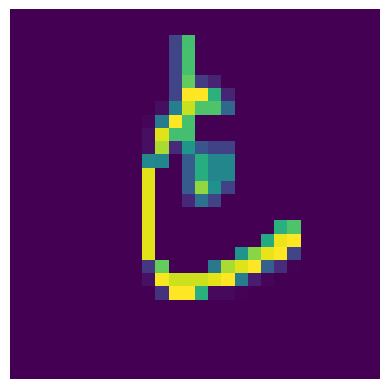

label: 6, prediction: 6


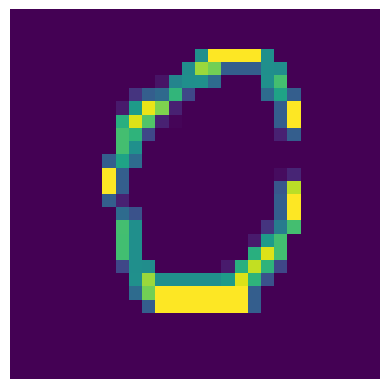

label: 0, prediction: 0


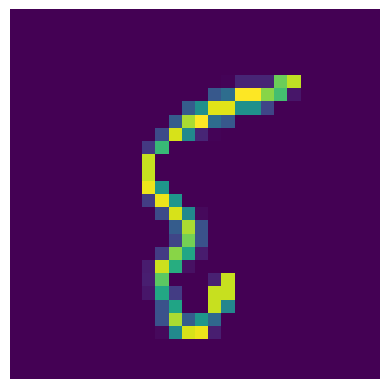

label: 9, prediction: 9


In [30]:
def plot_digit(number):
    prediction = predict('euclidean',train_data,number,k)

    pixels = number[1:].reshape(28,28)

    plt.imshow(pixels)
    plt.axis("off")
    plt.show()
    print(f"label: {number[0]}, prediction: {prediction}")

plot_digit(cv_data[750])
plot_digit(cv_data[370])
plot_digit(cv_data[69])

In [31]:
m,n = cv_data.shape
y_pred_euc = []
for i in range(2000):
  pred = predict('euclidean',train_data,cv_data[i],k)
  y_pred_euc.append(pred)
print(accuracy(y_pred_euc,cv_data[:2000,0].T))

0.97


In [32]:
y_pred_manh = []
for i in range(2000):
  pred = predict('manhattan',train_data,cv_data[i],k)
  y_pred_manh.append(pred)
print(accuracy(y_pred_manh,cv_data[:2000,0].T))

0.97


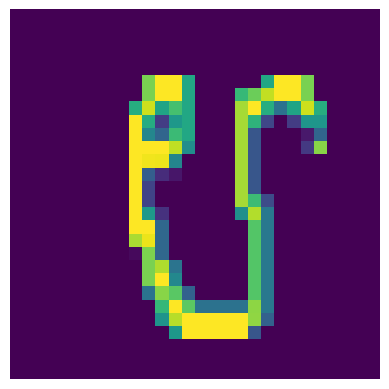

ID: 18381, prediction: 8


In [41]:
def test_digit(number):
    prediction = predict('euclidean',train_data,number,k)

    pixels = number[1:].reshape(28,28)

    plt.imshow(pixels)
    plt.axis("off")
    plt.show()
    print(f"ID: {number[0]}, prediction: {prediction}")

test_digit(np.array(test)[908])

# Source Code

In [ ]:
class KNN():
  def __init__(self,distance_formula):
    self.get_distance = distance_formula

  def get_distance(self,train_data_point,test_data_point):
    if(self.distance_formula == 'euclidean'):
      dist = np.sum((train_data_point-test_data_point)**2)
      eucl_dist = np.sqrt(dist)
      return eucl_dist
    if(self.distance_formula == 'manhattan'):
      manhattan_dist = np.sum(abs(train_data_point-test_data_point))
      return manhattan_dist

  def nearest_neighbours(self,x_train,test_data,k):
    distance_list=[]
    for training_data in x_train:
      distance = self.get_distance(training_data,test_data)
      distance_list.append(training_data,distance)
    distance_list.sort(key = lambda x:x[1])

    neighbours_list = []
    for i in range(k):
      neighbours_list.append(distance_list[i][0])

    return neighbours_list
  def predict(self,x_train,test_data,k):
    neighbours = self.nearest_neighbours(x_train,test_data,k)

    label=[]
    for data in neighbours:
      label.append(data[0])

    pred_class = statistics.mode(label)

    return pred_class